In [1]:
import os
from pathlib import Path
import numpy as np
import mne

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# Import fooof for checking model fits
from fooof import FOOOF
from fooof import FOOOFGroup

# KNEE freqs
from fooof.utils.params import compute_knee_frequency

# Plotting functions
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn

 # SET PSD calculation and FOOOF PARAMETERS

In [2]:
f_min = 1
f_max = 45
t     = 15
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}


# Set the vectors to store the results

In [3]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [8]:
W_Kn  = np.zeros([len(regions)-4,200])*np.nan
W_Exp = np.zeros([len(regions)-4,200])*np.nan

N2_Kn  = np.zeros([len(regions)-4,200])*np.nan
N2_Exp = np.zeros([len(regions)-4,200])*np.nan

N3_Kn  = np.zeros([len(regions)-4,200])*np.nan
N3_Exp = np.zeros([len(regions)-4,200])*np.nan

R_Kn  = np.zeros([len(regions)-4,200])*np.nan
R_Exp = np.zeros([len(regions)-4,200])*np.nan



# WAKEFULNESS

In [9]:
PSDs_W =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_W[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

    #plt.yscale("log")
    #plt.xscale("log")
    #plt.plot(np.mean(EEG_psd._data,0))
    #plt.plot(np.mean(np.mean(EEG_psd._data,0),0))
    
    # parameters exctract
    W_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    W_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 53 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior insula_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 71 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Calcarine cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure.

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 79 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Supplementary motor cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 47 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Supramarginal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 70 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Transverse temporal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 14 power spectra.
Ext

In [7]:
np.shape(PSDs_W)

(34, 661)

In [6]:
np.shape(fm1.get_params('aperiodic_params','knee'))

(173,)

# N2

In [10]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N2 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N2[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N2_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N2_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine cortex_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Middle temporal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 115 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Opercular part of inferior frontal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 30 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Orbital part of inferior frontal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 17 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Parietal operculum_N.edf...
EDF file detected
Setting channel info structure...
Creating

# N3

In [11]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N3 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N3[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N3_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N3_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine cortex_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Middle temporal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 115 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Opercular part of inferior frontal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 30 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Orbital part of inferior frontal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 17 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Parietal operculum_D.edf...
EDF file detected
Setting channel info structure...
Creating

# REM 

In [12]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_R =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_R[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    R_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    R_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 42 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 19 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 35 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Calcarine cortex_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.00

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 28 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Supramarginal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 39 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Transverse temporal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 4 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Triangular part of inferior frontal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 29 power spectra.


# PLOTTING

/tmp/ipykernel_3644895/2426908012.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])
/tmp/ipykernel_3644895/2426908012.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])


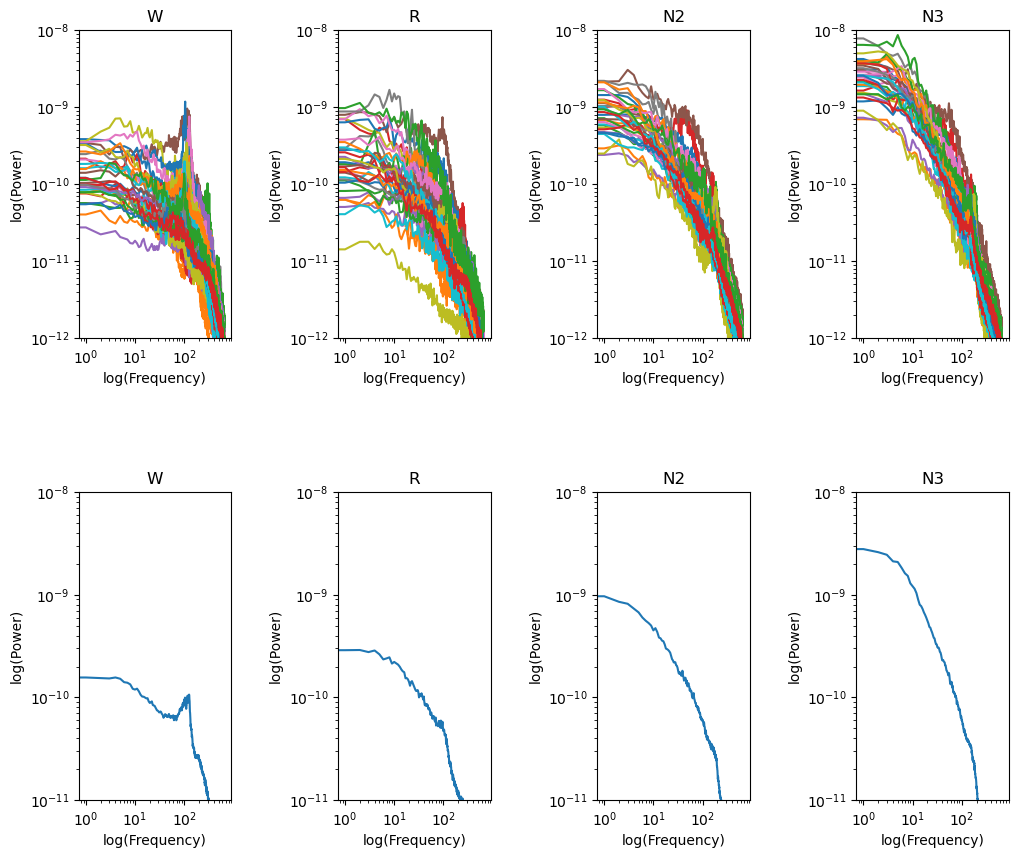

In [13]:
array_list = [PSDs_W, PSDs_R,PSDs_N2, PSDs_N3]

titles =  ['W','R','N2','N3']
# Plotting
#fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 6)) # create a subplot
fig = plt.figure(figsize=(12, 10))    
fig.subplots_adjust(hspace=0.5, wspace=0.7)

for i, V in enumerate(array_list):
    
    ax = fig.add_subplot(2, 4, i+1)

    ax.loglog(np.transpose(V))
    ax.set_xlabel('log(Frequency)')
    ax.set_ylabel('log(Power)')
    ax.title.set_text(titles[i])
    ax.set_ylim([10e-13 ,10e-9])
    ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])

    ax = fig.add_subplot(2, 4, i+5)
    ax.loglog(np.nanmean(V,0))
    ax.set_xlabel('log(Frequency)')
    ax.set_ylabel('log(Power)')   
    ax.title.set_text(titles[i])
    ax.set_ylim([10e-12 ,10e-9])
    ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])


In [18]:
np.nanmean(V,0)

array([3.16217327e-09, 2.81413025e-09, 2.53515130e-09, 2.30368268e-09,
       2.04686480e-09, 2.16359529e-09, 1.84042078e-09, 1.65120717e-09,
       1.57478949e-09, 1.31597535e-09, 1.22674763e-09, 1.22768176e-09,
       1.12958590e-09, 9.40751106e-10, 8.07878844e-10, 7.70644470e-10,
       7.81447664e-10, 7.21790880e-10, 6.86060232e-10, 6.44998215e-10,
       5.91326772e-10, 5.48650304e-10, 4.94249148e-10, 5.15112317e-10,
       4.95550680e-10, 4.72601250e-10, 4.48984219e-10, 4.21448236e-10,
       4.20595512e-10, 3.75071880e-10, 3.63582508e-10, 3.62216145e-10,
       3.43221984e-10, 3.50027208e-10, 3.55751412e-10, 3.45220404e-10,
       3.24687533e-10, 3.19916755e-10, 3.01878873e-10, 2.79005329e-10,
       2.59222863e-10, 2.65679313e-10, 2.74102795e-10, 2.66381082e-10,
       2.63034506e-10, 2.64679402e-10, 2.47752401e-10, 2.50450392e-10,
       2.34530932e-10, 2.19890754e-10, 2.18542646e-10, 2.16012411e-10,
       2.20548691e-10, 1.99252859e-10, 2.05016404e-10, 2.14442975e-10,
      

In [20]:
# Compute knee frequency
Kn_W = compute_knee_frequency(W_Kn, W_Exp)
Kn_N2 = compute_knee_frequency(N2_Kn, N2_Exp)
Kn_N3 = compute_knee_frequency(N3_Kn, N3_Exp)
Kn_R = compute_knee_frequency(R_Kn, R_Exp)

In [31]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_R,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1)]
np.shape(array_list2

/tmp/ipykernel_3632841/2209712074.py:1: RuntimeWarning: Mean of empty slice
  array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_R,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1)]


[array([11.13746922,  7.65249833, 11.97516163, 10.88432709, 12.70360912,
        11.88647862, 12.35574154,  5.92829968,  9.00976958, 10.69821026,
        11.28713662,  7.49689104, 16.814025  , 10.91577534, 11.85992342,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan]),
 array([ 9.14106502,  8.57515688,  4.67597906,  3.15631992,  7.62048291,
         5.02989277, 11.17596006,  5.84473733,  4.30806313,  7.30133146,
         6.25720147,  8.59303681,  3.94275164, 13.66126396,  6.71950678,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan]),


/tmp/ipykernel_3602085/68141535.py:1: RuntimeWarning: Mean of empty slice
  array_list2 = [np.mean(Kn_W,1), np.mean(Kn_R,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1)]
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_3602085/68141535.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(titles)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stri

<AxesSubplot: ylabel='Exponent'>

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


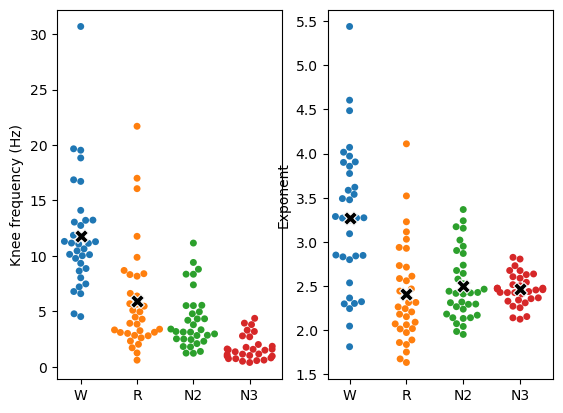

In [140]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_R,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1)]
array_list3 = [np.mean(W_Exp,1), np.mean(R_Exp,1), np.mean(N2_Exp,1), np.mean(N3_Exp,1)]

titles =  ['W','R','N2','N3']

fig = plt.figure()  

ax = fig.add_subplot(1, 2, 1)

ax = seaborn.swarmplot(data=array_list2)
ax.set( ylabel='Knee frequency (Hz)')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list2,1), marker='X', color='black', s=100, zorder=4, legend=False)

ax = fig.add_subplot(1, 2, 2)
ax = seaborn.swarmplot(data=array_list3)
ax.set( ylabel='Exponent')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list3,1), marker='X', color='black', s=100, zorder=4, legend=False)





In [12]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# N1

In [ ]:
# SAME FOR N1
dataset = 'N1_AllRegions'
regions = np.sort(os.listdir(data_path / dataset))

i=0

for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
      
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,1), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

    # parameters exctract
    N1_Kn[i,:]  = fm1.get_params('aperiodic_params','knee')
    N1_Exp[i,:] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1

# N2

In [57]:
dataset = 'N2_AllRegions'
regions = np.sort(os.listdir(data_path / dataset))

i = 0
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    SampSize2[i] = len(EEG.ch_names)
    EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    i = i+1
    

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Amygdala_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine cortex_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Central operculum_N.e

In [61]:
EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
fm1 = FOOOFGroup(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Loading data for 25 events and 4000 original time points ...
0 bad epochs dropped
Effective window size : 15.000 (s)
Running FOOOFGroup across 41 power spectra.


In [18]:
fm1.get_params('aperiodic_params','offset')

array([-8.52603466, -8.30855903, -8.24962725, -8.30967279, -8.70021413,
       -8.74220836, -8.93542767, -9.13775444, -8.78647272, -8.74091728,
       -8.80194519, -8.48635312, -8.79454718, -9.07816742, -8.77728494,
       -8.18267117, -8.06135414, -8.50304235, -8.55926669, -8.69329895,
       -8.73131998, -8.76544036, -8.84089379, -8.3558557 , -8.45020795])

In [52]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regionsN3 = np.sort(os.listdir(data_path / dataset))

In [54]:
# Load data file
i = 0
SampSize3=np.zeros(len(regionsN3))*np.nan
for R in regionsN3:
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    SampSize3[i] = len(EEG.ch_names)
   # EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    #EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
   # fm1 = FOOOFGroup(**SETTINGS_F1)
    #fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,1), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    i = i+1
    

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Amygdala_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine cortex_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Central operculum_D.e

In [53]:
regionsN3

array(['Amygdala_D.edf', 'Angular gyrus_D.edf',
       'Anterior cingulate_D.edf', 'Anterior insula_D.edf',
       'Calcarine cortex_D.edf', 'Central operculum_D.edf',
       'Cuneus_D.edf', 'Frontal operculum_D.edf',
       'Fusiform and parahippocampal gyri_D.edf',
       'Gyrus rectus and orbital gyri_D.edf', 'Hippocampus_D.edf',
       'Inferior ocipital gyrus and occipital pole_D.edf',
       'Inferior temporal gyrus_D.edf',
       'Lingual gyrus and occipital fusiform gyrus_D.edf',
       'Medial frontal cortex_D.edf',
       'Medial segment of precentral gyrus_D.edf',
       'Medial segment of superior frontal gyrus_D.edf',
       'Middle cingulate_D.edf', 'Middle frontal gyrus_D.edf',
       'Middle temporal gyrus_D.edf',
       'Opercular part of inferior frontal gyrus_D.edf',
       'Orbital part of inferior frontal gyrus_D.edf',
       'Parietal operculum_D.edf', 'Planum temporale_D.edf',
       'Postcentral gyrus (including medial segment)_D.edf',
       'Posterior cingulat

In [55]:
SampSize3

array([  6.,  52.,  31.,  54.,  10.,  46.,  18.,  24.,  41.,  41.,  30.,
        22.,  40.,  21.,  15.,  13.,  16.,  31., 149., 115.,  30.,  17.,
        31.,  29.,  43.,  25.,  25.,  82.,  37.,  16.,  78.,  40.,  69.,
        37.,  65.,  16.,  12.,  41.])

In [29]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions2 = os.listdir(data_path / dataset)

EEG2 = mne.io.read_raw_edf(data_path / dataset / regions2[2])

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [31]:
EEG2.__dict__

{'preload': False,
 '_last_samps': array([13599]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: GD010Rp10R, GD010Rp11R, GD010Rp12R, GD010Rp13R, GD010Rp14R, ...
  chs: 42 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 100.0 Hz
  meas_date: 1970-01-01 00:00:00 UTC
  nchan: 42
  projs: []
  sfreq: 200.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 '_raw_extras': [{'events': [],
   'units': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.

In [10]:
regions

['Anterior cingulate_R.edf',
 'Amygdala_R.edf',
 'Angular gyrus_R.edf',
 'Inferior temporal gyrus_R.edf',
 'Anterior insula_R.edf',
 'Calcarine cortex_R.edf',
 'Central operculum_R.edf',
 'Cuneus_R.edf',
 'Frontal operculum_R.edf',
 'Hippocampus_R.edf',
 'Fusiform and parahippocampal gyri_R.edf',
 'Gyrus rectus and orbital gyri_R.edf',
 'Inferior ocipital gyrus and occipital pole_R.edf',
 'Lingual gyrus and occipital fusiform gyrus_R.edf',
 'Medial frontal cortex_R.edf',
 'Medial segment of precentral gyrus_R.edf',
 'Medial segment of superior frontal gyrus_R.edf',
 'Middle cingulate_R.edf',
 'Middle frontal gyrus_R.edf',
 'Middle temporal gyrus_R.edf',
 'Opercular part of inferior frontal gyrus_R.edf',
 'Orbital part of inferior frontal gyrus_R.edf',
 'Parietal operculum_R.edf',
 'Planum temporale_R.edf',
 'Postcentral gyrus (including medial segment)_R.edf',
 'Posterior cingulate_R.edf',
 'Posterior insula_R.edf',
 'Precentral gyrus_R.edf',
 'Precuneus_R.edf',
 'Superior and middle o